**Redo the optimization but using Simulated Annealing**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
# Define internal energy function
def energy_function(p, A):
    return np.sum(A * np.outer(p, p))

# Define the Shannon entropy function
def shannon_entropy(probabilities, A):
    # Remove any zero probabilities to avoid log(0) issues
    probabilities = probabilities[probabilities != 0]
    return np.sum(probabilities * np.log(probabilities))

# Corrected Simulated Annealing Function
def simulated_annealing(energy_func, initial_state, A, num_iterations=1000, initial_temperature=1.0, cooling_rate=0.95):
    current_state = initial_state
    current_energy = energy_func(current_state, A)
    best_state = current_state
    best_energy = current_energy
    energy_history = []

    for _ in range(num_iterations):
        temperature = initial_temperature * (cooling_rate**_)

        # Generate a new state
        new_state = current_state + np.random.normal(0, 0.1, len(current_state))

        # Evaluate the energy of the new state
        new_energy = energy_func(new_state, A)

        # Accept the new state with a probability based on the Metropolis criterion
        if np.random.rand() < np.exp((current_energy - new_energy) / temperature):
            current_state = new_state
            current_energy = new_energy

        # Update the best state if needed
        if new_energy < best_energy:
            best_state = new_state
            best_energy = new_energy

        energy_history.append(best_energy)

    return best_state, -best_energy, energy_history

# Function to perform optimization with simulated annealing
def perform_simulated_annealing(A, function, num_runs=1, num_iterations=1000, initial_temperature=1.0, cooling_rate=0.95):
    result_list = []

    for _ in range(num_runs):
        initial_probabilities = np.random.rand(len(A))

        # Simulated Annealing
        optimized_probabilities, optimized_energy, energy_history = simulated_annealing(function, initial_probabilities, A, num_iterations, initial_temperature, cooling_rate)
        result_list.append(optimized_energy)

    return result_list, energy_history

# Example initial array
matrix_size = 4
test_matrix = np.random.rand(matrix_size, matrix_size)

# Perform simulated annealing optimization
energies_optimization_SA, energy_history = perform_simulated_annealing(test_matrix, energy_function)

# Perform simulated annealing for maximum entropy
entropies_annealing, entropy_history = perform_simulated_annealing(test_matrix, shannon_entropy)

print(len(energy_history))
print(len(entropy_history))
iteration_list = list(range(len(energy_history)))

plt.plot(iteration_list, energy_history)
plt.show()

plt.plot(iteration_list, entropy_history)
plt.show()

# Plotting the histograms side by side
plt.figure(figsize=(10, 5))

# Plotting Minimum Energy histogram
plt.subplot(1, 2, 1)
plt.hist(energies_optimization_SA, bins=100, edgecolor='black', alpha=0.7, density=True, label='Simulated Annealing')
plt.title('Minimum Energy U(p) (Simulated Annealing)')
plt.xlabel('Minimum Internal Energy U(p)')
plt.ylabel('Frequency')
plt.grid(True)

# Plotting Maximum Entropy histogram
plt.subplot(1, 2, 2)
plt.hist(entropies_annealing, bins=100, edgecolor='black', alpha=0.7, density=True, label='Simulated Annealing')
plt.title('Maximum Entropy S(p) (Simulated Annealing)')
plt.xlabel('Maximum Entropy S(p)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [34]:
def shannon_entropy(probabilities):
    # Remove any zero probabilities to avoid log(0) issues
    probabilities = probabilities[probabilities != 0]
    return -np.sum(probabilities * np.log(probabilities))

def simulated_annealing_max_entropy(initial_probabilities, num_iterations=5000, initial_temperature=1.0, cooling_rate=0.95):
    current_probabilities = initial_probabilities
    current_entropy = shannon_entropy(current_probabilities)
    entropy_history = [current_entropy]

    for _ in range(num_iterations):
        temperature = initial_temperature * (cooling_rate ** _)

        # Generate a new set of probabilities
        new_probabilities = generate_probability_list(len(current_probabilities))

        # Evaluate the entropy of the new set of probabilities
        new_entropy = shannon_entropy(new_probabilities)

        # Accept the new set of probabilities if its entropy is greater
        if new_entropy > current_entropy or np.random.rand() < np.exp((new_entropy - current_entropy) / temperature):
            current_probabilities = new_probabilities
            current_entropy = new_entropy

        entropy_history.append(current_entropy)

    return entropy_history

def generate_probability_list(size):
    # Generate a list of random numbers
    random_numbers = np.random.rand(size)

    # Normalize the list to make it a probability distribution
    probabilities = random_numbers / np.sum(random_numbers)

    return probabilities

In [35]:
entropy_histories = []

for i in range(10):
    # Example usage
    size_of_list = 1000
    initial_guess = generate_probability_list(size_of_list)
    entropy_history = simulated_annealing_max_entropy(initial_guess)
    entropy_histories.append(entropy_history)

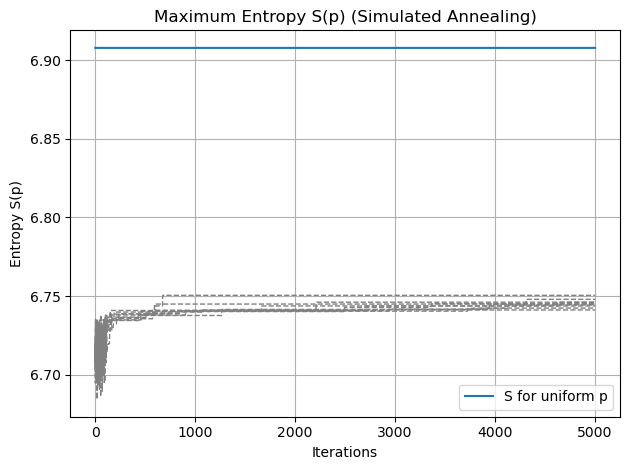

In [36]:
# Generate the entropy for a uniform probability distribution, which should be the real maximum entropy
uniform_probabilities = np.full(size_of_list, 1/size_of_list)
uniform_entropy = shannon_entropy(uniform_probabilities)
iteration_list = list(range(len(entropy_history)))

for i in range(0, len(entropy_histories)):
    plt.plot(entropy_histories[i], color='grey', linestyle='--', linewidth=1)
plt.plot(iteration_list, [uniform_entropy]*len(entropy_history), label = 'S for uniform p')
#plt.plot(entropy_history_averages, color='red', linestyle='-', linewidth=1, label = 'S for optimised p')
plt.title('Maximum Entropy S(p) (Simulated Annealing)')
plt.xlabel('Iterations')
plt.ylabel('Entropy S(p)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()